# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
data = pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [334]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [335]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [336]:
print('Нулевой класс (%)', round(data['Class'].value_counts()[0] / len(data) * 100, 3))
print('Первый класс (%)', round(data['Class'].value_counts()[1] / len(data) * 100, 3))


Нулевой класс (%) 99.827
Первый класс (%) 0.173


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [338]:
X = data.drop(columns=["Class"])
Y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [339]:
const_pred = np.zeros(y_test.size)

In [340]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.predict(X_test)
logreg_pred = logreg.predict(X_test)
logreg_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [342]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)[:, 1]


In [343]:
print(f"Accuracy для константы: {accuracy_score(y_test, const_pred)}")
print(f"Accuracy для KNN: {accuracy_score(y_test, knn_pred)}")
print(f"Accuracy для логистической регрессии: {accuracy_score(y_test, logreg_pred)}")

print(f"Precision для константы: {precision_score(y_test, const_pred)}")
print(f"Precision для KNN: {precision_score(y_test, knn_pred)}")
print(f"Precision для логистической регрессии: {precision_score(y_test, logreg_pred)}")

print(f"Recall для константы: {recall_score(y_test, const_pred)}")
print(f"Recall для KNN: {recall_score(y_test, knn_pred)}")
print(f"Recall для логистической регрессии: {recall_score(y_test, logreg_pred)}")

print(f"f1 для константы: {f1_score(y_test, const_pred)}")
print(f"f1 для KNN: {f1_score(y_test, knn_pred)}")
print(f"f1 для логистической регрессии: {f1_score(y_test, logreg_pred)}")

Accuracy для константы: 0.9984129659279234
Accuracy для KNN: 0.9994101289289626
Accuracy для логистической регрессии: 0.9991994606893064
Precision для константы: 0.0
Precision для KNN: 0.8514851485148515
Precision для логистической регрессии: 0.85
Recall для константы: 0.0
Recall для KNN: 0.7610619469026548
Recall для логистической регрессии: 0.6017699115044248
f1 для константы: 0.0
f1 для KNN: 0.8037383177570093
f1 для логистической регрессии: 0.7046632124352332


c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\poisk\AppData\Local\Temp\ipykernel_14732\232092538.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_logreg, tpr_logreg, "b", linewidth=2, color="red", label="Logistic regression")
C:\Users\poisk\AppData\Local\Temp\ipykernel_14732\232092538.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_knn, tpr_knn, "b", linewidth=2, color="blue", label="KNN")


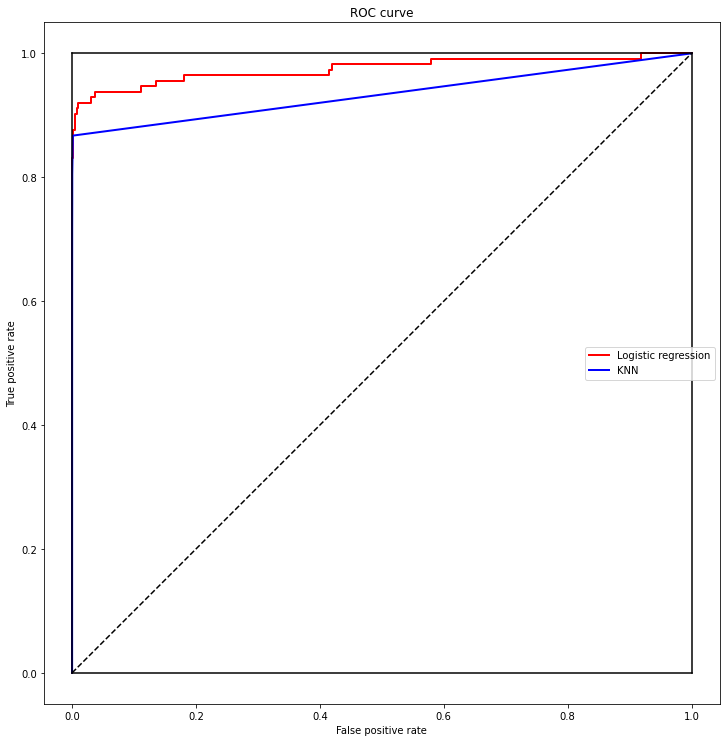

AUC для KNN: 0.9334594538542427
AUC для логистической регрессии: 0.9745163018263159


In [344]:
#ROC-кривая
plt.figure(figsize=(10,10))

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_pred_proba)
plt.plot(fpr_logreg, tpr_logreg, "b", linewidth=2, color="red", label="Logistic regression")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_pred_proba)
plt.plot(fpr_knn, tpr_knn, "b", linewidth=2, color="blue", label="KNN")
plt.tight_layout()
plt.legend()
plt.plot([0, 1], [0, 1], "k--")
plt.plot([0, 0], [0, 1], "k")
plt.plot([1, 1], [0, 1], "k")
plt.plot([0, 1], [0, 0], "k")
plt.plot([0, 1], [1, 1], "k")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis("equal")
plt.title("ROC curve")
plt.show()

print(f"AUC для KNN: {roc_auc_score(y_test, knn_pred_proba)}")
print(f"AUC для логистической регрессии: {roc_auc_score(y_test, logreg_pred_proba)}")


### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Лучше всего подойдет recall, т.к. он показывает соотношение обнаруженных мошеннических транзакций к числу всех мошеннических транзакций. Эта метрика подойдет лучше всего, потому что главная задача - обнаруживать и наказывать мошенников.


### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

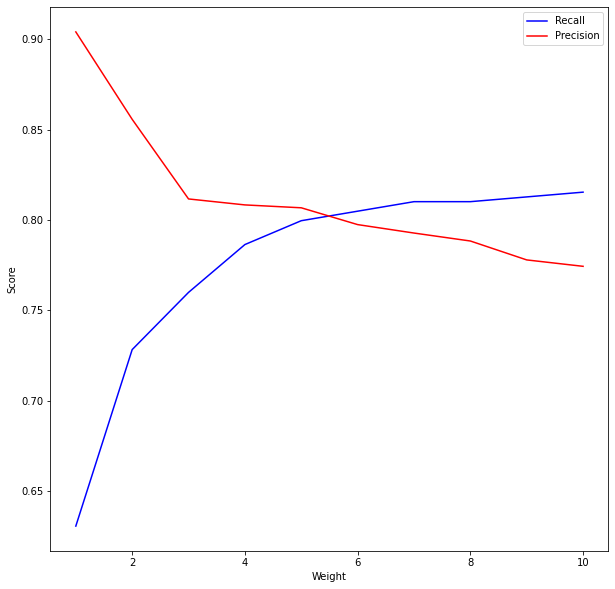

In [345]:
from sklearn.model_selection import cross_val_score


recalls = []
precisions = []
for weight in [*range(1, 11)]:
    precision = cross_val_score(LogisticRegression(class_weight={0: 1, 1: weight}), X_train, y_train, cv=5,
                            scoring="precision")
    recall = cross_val_score(LogisticRegression(class_weight={0: 1, 1: weight}), X_train, y_train, cv=5,
                             scoring="recall")

    precisions.append(precision)
    recalls.append(recall)
recalls = list(map(lambda x: np.mean(x), recalls))
precisions = list(map(lambda x: np.mean(x), precisions))
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.arange(1, 11), recalls, color="blue", label="Recall")
ax.plot(np.arange(1, 11), precisions, color="red", label="Precision")
plt.legend()
plt.xlabel("Weight")
plt.ylabel("Score")
plt.show()


Выберем вес равным 8, т.к. при последующем увеличении веса recall растет незначительно, а precision быстро уменьшается

c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:122: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + 0.5 * alpha * np.dot(w, w)
c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:127: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\linear_model\_logis

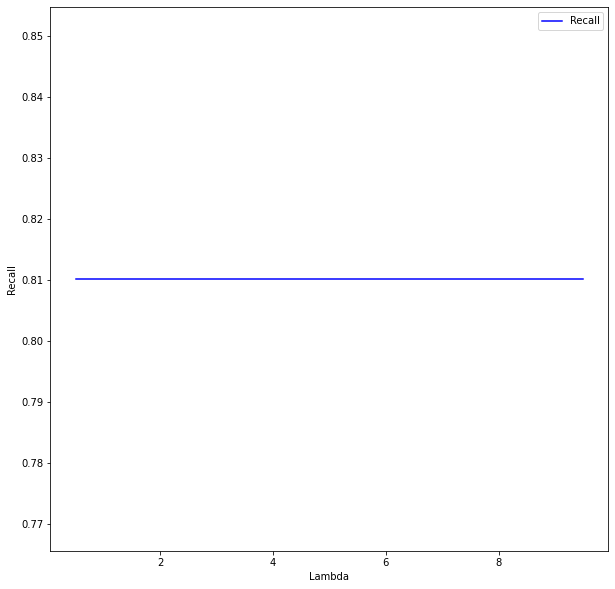

In [346]:
recalls = []
for lambda_ in np.arange(0, 10, 0.5):
    recall = np.mean(cross_val_score(LogisticRegression(C=lambda_, class_weight={0: 1, 1: 8}), X_train, y_train, cv=5,
                                     scoring="recall"))
    recalls.append(recall)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.arange(0, 10, 0.5), recalls, color="blue", label="Recall")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Recall")
plt.show()


Recall не зависит от лямбды.

In [347]:
score_none = np.mean(
    cross_val_score(LogisticRegression(penalty="none", class_weight={0: 1, 1: 8}), X_train, y_train, cv=5,
                    scoring="recall"))
print(f"Recall без регуляризации: {score_none}")


Recall без регуляризации: 0.8101052631578947


In [348]:
logreg = LogisticRegression(class_weight={0: 1, 1: 8})
logreg.fit(X_train, y_train)
logreg_pred_final = logreg.predict(X_test)
logreg_pred_proba_final = logreg.predict_proba(X_test)[:, 1]

print(f"Recall для исходной регрессии: {recall_score(y_test, logreg_pred)}")
print(f"Recall для KNN: {recall_score(y_test, knn_pred)}")
print(f"Recall для итоговой регрессии: {recall_score(y_test, logreg_pred_final)}")
print(f"AUC для начальной логистической регрессии: {roc_auc_score(y_test, logreg_pred_proba)}")
print(f"AUC для итоговой логистической регрессии: {roc_auc_score(y_test, logreg_pred_proba_final)}")


Recall для исходной регрессии: 0.6017699115044248
Recall для KNN: 0.7610619469026548
Recall для итоговой регрессии: 0.8141592920353983
AUC для начальной логистической регрессии: 0.9745163018263159
AUC для итоговой логистической регрессии: 0.9769152640146832


C:\Users\poisk\AppData\Local\Temp\ipykernel_14732\3026347828.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_logreg, tpr_logreg, "b", linewidth=2, color="red", label="Logistic regression")
C:\Users\poisk\AppData\Local\Temp\ipykernel_14732\3026347828.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_logreg_f, tpr_logreg_f, "b", linewidth=2, color="blue", label="Final logistic regression")


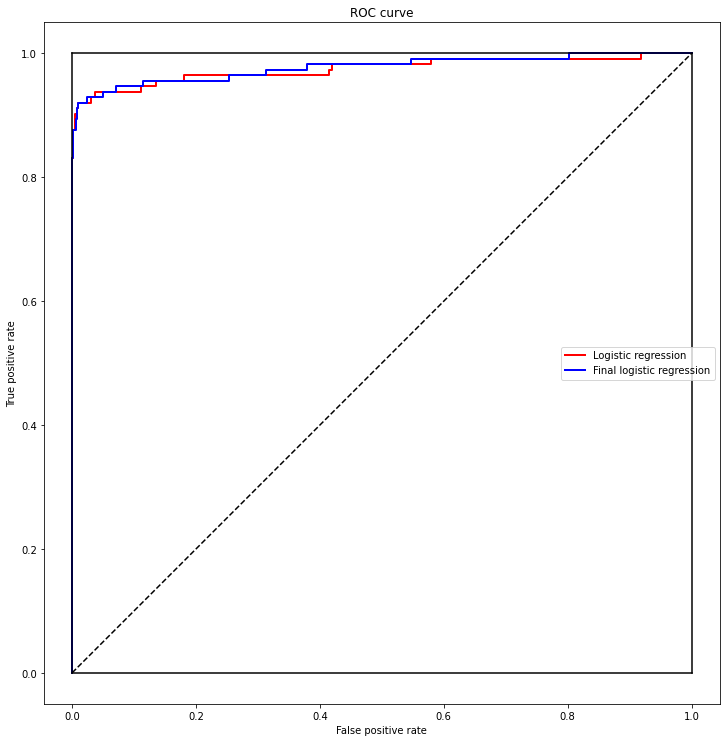

In [349]:
#ROC-curve
plt.figure(figsize=(10, 10))

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_pred_proba)
plt.plot(fpr_logreg, tpr_logreg, "b", linewidth=2, color="red", label="Logistic regression")

fpr_logreg_f, tpr_logreg_f, thresholds_logreg_f = roc_curve(y_test, logreg_pred_proba_final)
plt.plot(fpr_logreg_f, tpr_logreg_f, "b", linewidth=2, color="blue", label="Final logistic regression")
plt.tight_layout()
plt.legend()
plt.plot([0, 1], [0, 1], "k--")
plt.plot([0, 0], [0, 1], "k")
plt.plot([1, 1], [0, 1], "k")
plt.plot([0, 1], [0, 0], "k")
plt.plot([0, 1], [1, 1], "k")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis("equal")
plt.title("ROC curve")
plt.show()


Итак, получилось немножко улучшить AUC, recall для логистической регрессии.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Ссылка на датасет: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&sortBy=voteCount

Будем предсказывать ценовой диапазон (0,1,2 или 3) смартфона.

In [317]:
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [318]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [319]:
from sklearn.model_selection import train_test_split

X = dataset.drop('price_range', axis=1)
y = dataset['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scal = StandardScaler()
scal.fit(X_train)
X_train_scaled = scal.transform(X_train)
X_test_scaled = scal.transform(X_test)


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [320]:
const_pred = np.zeros(y_test.size)
print(f"Accuracy для константы: {accuracy_score(y_test, const_pred)}")


Accuracy для константы: 0.2625


In [321]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
print(accuracy_score(y_test, logreg_pred))

0.975


In [322]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test, knn_pred))

0.53


In [323]:
print(f"Accuracy для константы: {accuracy_score(y_test, const_pred)}")
print(f"Accuracy для KNN: {accuracy_score(y_test, knn_pred)}")
print(f"Accuracy для логистической регрессии: {accuracy_score(y_test, logreg_pred)}")

print(f"Precision для константы: {precision_score(y_test, const_pred, average='macro')}")
print(f"Precision для KNN: {precision_score(y_test, knn_pred, average='macro')}")
print(f"Precision для логистической регрессии: {precision_score(y_test, logreg_pred, average='macro')}")

print(f"Recall для константы: {recall_score(y_test, const_pred, average='macro')}")
print(f"Recall для KNN: {recall_score(y_test, knn_pred, average='macro')}")
print(f"Recall для логистической регрессии: {recall_score(y_test, logreg_pred, average='macro')}")

print(f"f1 для константы: {f1_score(y_test, const_pred, average='macro')}")
print(f"f1 для KNN: {f1_score(y_test, knn_pred, average='macro')}")
print(f"f1 для логистической регрессии: {f1_score(y_test, logreg_pred, average='macro')}")

Accuracy для константы: 0.2625
Accuracy для KNN: 0.53
Accuracy для логистической регрессии: 0.975
Precision для константы: 0.065625
Precision для KNN: 0.551408579699732
Precision для логистической регрессии: 0.9751162260148967
Recall для константы: 0.25
Recall для KNN: 0.522141762223284
Recall для логистической регрессии: 0.9746570910973085
f1 для константы: 0.10396039603960397
f1 для KNN: 0.5282378353021564
f1 для логистической регрессии: 0.9744087955693105


c:\users\poisk\pycharmprojects\machine_learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Очевидно, что константа не работает, так как нет какого-то главного преобладающего класса. KNN тоже работает плохо.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Выберем метрику Accuracy, т.к. мы хотим наиболее часто верно предсказывать ценовой класс смартфона, используем логическую регрессию.

In [324]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LogisticRegression(max_iter=1000), X_train_scaled, y_train, cv=5, scoring="accuracy"))


0.95

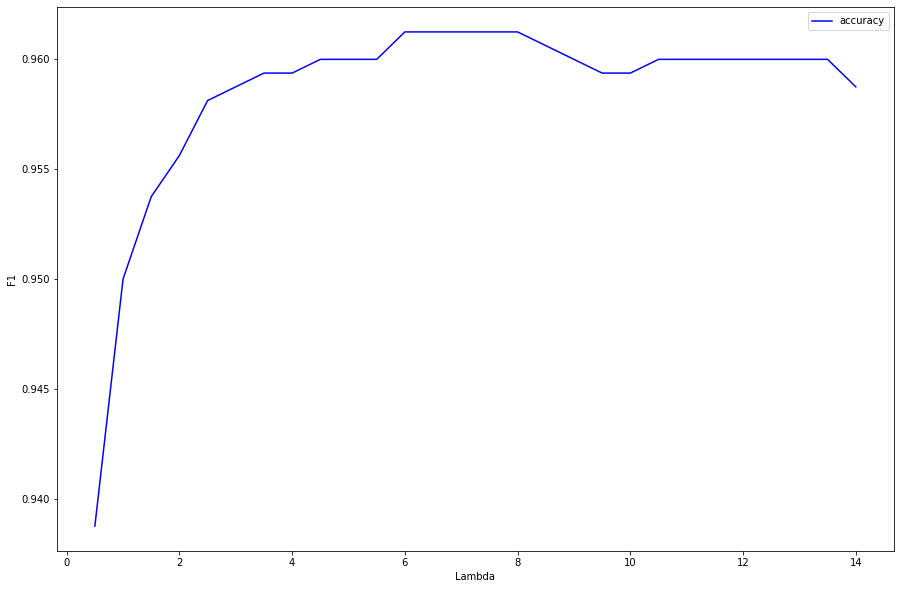

In [325]:
coefs = []
for lambda_ in np.arange(0.5, 14.5, 0.5):
    f1 = np.mean(cross_val_score(LogisticRegression(max_iter=1000, penalty="l2", C=lambda_),
                                 X_train_scaled, y_train, cv=5, scoring="accuracy"))
    coefs.append(f1)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(np.arange(0.5, 14.5, 0.5), coefs, color="blue", label="accuracy")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("F1")
plt.show()

In [326]:
# наилучшая лямда = 7
score = np.mean(cross_val_score(LogisticRegression(max_iter=1000, penalty="l2", C=7),
                                 X_train_scaled, y_train, cv=5, scoring="accuracy"))
print(score)

0.9612499999999999


In [327]:
final_logreg = LogisticRegression(max_iter=1000, C=7)
final_logreg.fit(X_train_scaled, y_train)
final_pred = final_logreg.predict(X_test_scaled)
print(accuracy_score(logreg_pred, y_test))
print(accuracy_score(final_pred, y_test))

0.975
0.975


Точность предсказаний получилась хорошая, но повысить качество предсказаний не вышло